# Intraday

In [1]:
import pandas as pd
Intraday = pd.DataFrame()
Intraday = pd.read_excel('DATA1 EX 4.xlsx', sheet_name = 'Intraday_data')

In [2]:
Intraday.head()

,Datetime,HSI_Price,Date,Time,9:30 - 9:59,10:00 - 10:29,10:30 - 10:59,11:00 - 11:29,11:30 - 12:05,13:00 - 13:29,13:30 - 13:59,14:00 - 14:29,14:30 - 14:59,15:00 - 15:29,15:30 - 15:59
0,2023-01-16 09:30,21830.23047,2023-01-16,09:30:00,1,0,0,0,0,0,0,0,0,0,0
1,2023-01-16 09:31,21871.35938,2023-01-16,09:31:00,1,0,0,0,0,0,0,0,0,0,0
2,2023-01-16 09:32,21854.58008,2023-01-16,09:32:00,1,0,0,0,0,0,0,0,0,0,0
3,2023-01-16 09:33,21831.43945,2023-01-16,09:33:00,1,0,0,0,0,0,0,0,0,0,0
4,2023-01-16 09:34,21831.41016,2023-01-16,09:34:00,1,0,0,0,0,0,0,0,0,0,0


In [3]:
Intraday.isnull().sum()

Datetime         0
HSI_Price        0
Date             0
Time             0
9:30 - 9:59      0
10:00 - 10:29    0
10:30 - 10:59    0
11:00 - 11:29    0
11:30 - 12:05    0
13:00 - 13:29    0
13:30 - 13:59    0
14:00 - 14:29    0
14:30 - 14:59    0
15:00 - 15:29    0
15:30 - 15:59    0
dtype: int64

In [4]:
Intraday['Datetime'] = pd.to_datetime(Intraday['Datetime'])
Intraday = Intraday.set_index(Intraday['Datetime'])

<AxesSubplot:xlabel='Datetime'>

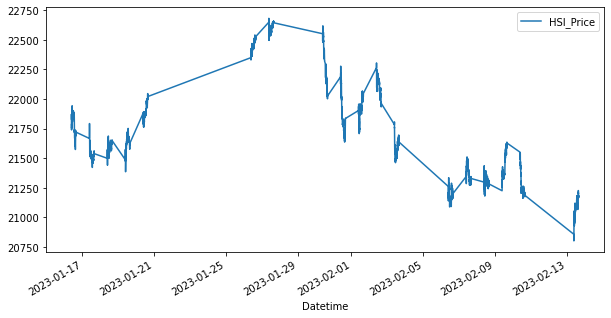

In [5]:
Intraday[['HSI_Price']].plot( figsize=[10,5])

In [6]:
#from scipy import signal

#detrended = signal.detrend(Intraday.HSI_Price)

#import numpy as np
#detrended_df = np.array(detrended)
#Intraday['detrended'] = detrended_df


In [7]:
import numpy as np
x_values = [i for i in range(0, len(Intraday))]
x_values = np.reshape(x_values, (len(x_values), 1))
#x_values = Intraday[['9:30 - 9:59', '10:00 - 10:29', '10:30 - 10:59', '11:00 - 11:29', '11:30 - 12:05', 
                     #'13:00 - 13:29', '13:30 - 13:59', '14:00 - 14:29', '14:30 - 14:59', '15:00 - 15:29', '15:30 - 15:59']].values
y_values = Intraday['HSI_Price'].values

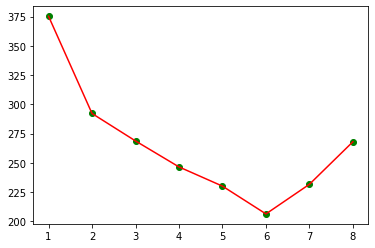

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
number_degrees = [1,2,3,4,5,6,7,8]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [9]:
poly_model = PolynomialFeatures(degree = 6)

poly_x_values = poly_model.fit_transform(x_values)


In [10]:
regression_model = LinearRegression()

fit = regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

print(regression_model.score(poly_x_values, y_values))

0.7732558226322825


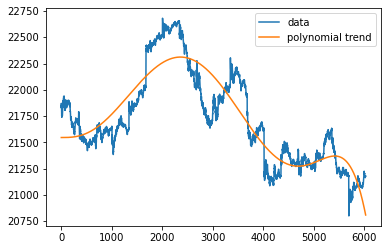

In [11]:
plt.plot(x_values, y_values)
plt.plot(x_values, y_pred)
plt.legend(['data', 'polynomial trend'])
plt.show()

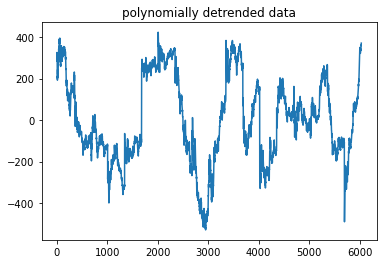

In [12]:
detrpoly = [y_values[i] - y_pred[i] for i in range(0, len(y_values))]
plt.plot(x_values, detrpoly)
plt.title('polynomially detrended data')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_values, y_pred)
rmse = np.sqrt(mean_squared_error(y_values, y_pred))
print('r2:', r2)
print('rmse', rmse)

r2: 0.7732558226322825
rmse 206.3221289361742


In [14]:
Intraday['Price'] = detrpoly

In [15]:
import statsmodels.api as sm

x = Intraday.drop(['Price', 'HSI_Price', 'Datetime', 'Datetime', 'Date', 'Time'], axis=1)
y = Intraday['Price']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8471
Date:                Sun, 12 Mar 2023   Prob (F-statistic):              0.593
Time:                        14:25:32   Log-Likelihood:                -40722.
No. Observations:                6035   AIC:                         8.147e+04
Df Residuals:                    6023   BIC:                         8.155e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.0714     24.321     -0.085

In [16]:
import warnings
warnings.filterwarnings('ignore')
Intraday.loc[Intraday['13:00 - 13:29'] == 1].mean()[0]

21705.407997701135

In [17]:
Intraday.loc[Intraday['9:30 - 9:59'] == 1].mean()[0]

21733.68871919175

In [18]:
Intraday.loc[Intraday['9:30 - 9:59'] == 1].mean()[0]/Intraday.loc[Intraday['13:00 - 13:29'] == 1].mean()[0]

1.0013029343421513

# Interday (Day)

In [55]:
Interday1 = pd.DataFrame()
Interday1 = pd.read_excel('DATA1 EX 4.xlsx', sheet_name = 'Interday_data')
Interday1 = Interday1[['Date','Price']]

In [56]:
Interday1.head()

,Date,Price
0,1987-01-02,2540.100098
1,1987-01-05,2552.399902
2,1987-01-06,2583.899902
3,1987-01-07,2607.100098
4,1987-01-08,2603.300049


In [57]:
Interday1.isnull().sum()

Date       0
Price    251
dtype: int64

In [58]:
Interday1 = Interday1.interpolate(method='linear', axis=0, limit=None)

In [59]:
Interday1.isnull().sum()

Date     0
Price    0
dtype: int64

In [60]:
from scipy import signal
detrended = signal.detrend(Interday1.Price)
detrended_df = np.array(detrended)
Interday1['detrended'] = detrended_df
Interday1.head()

,Date,Price,detrended
0,1987-01-02,2540.100098,210.999739
1,1987-01-05,2552.399902,220.454116
2,1987-01-06,2583.899902,249.108688
3,1987-01-07,2607.100098,269.463457
4,1987-01-08,2603.300049,262.817980


In [61]:
Interday1 = Interday1.set_index(Interday1['Date'])

In [96]:
Interday1['day'] = Interday1.index.dayofweek

In [97]:
result = pd.concat([Interday1, pd.get_dummies(Interday1['day'])], axis=1)
result.drop(['Date'], axis=1)

,Price,detrended,day,0,1,2,3,4,5
Date,,,,,,,,,
1987-01-02,2540.100098,210.999739,4,0,0,0,0,1,0
1987-01-05,2552.399902,220.454116,0,1,0,0,0,0,0
1987-01-06,2583.899902,249.108688,1,0,1,0,0,0,0
1987-01-07,2607.100098,269.463457,2,0,0,1,0,0,0
1987-01-08,2603.300049,262.817980,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2023-02-06,21222.160156,-7176.747417,0,1,0,0,0,0,0
2023-02-07,21298.699219,-7103.053782,1,0,1,0,0,0,0
2023-02-08,21283.519531,-7121.078897,2,0,0,1,0,0,0


<AxesSubplot:xlabel='Date'>

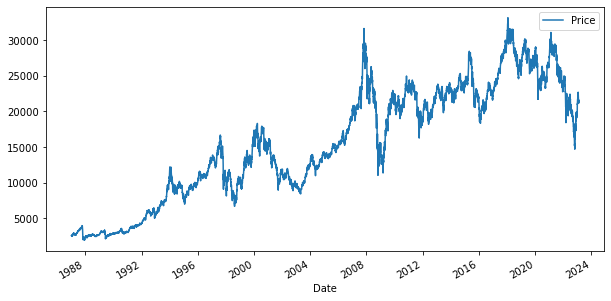

In [98]:
result[['Price']].plot( figsize=[10,5])

In [99]:
import numpy as np
x_values = [i for i in range(0, len(result))]
x_values = np.reshape(x_values, (len(x_values), 1))
y_values = result['Price'].values

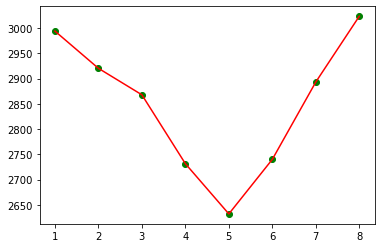

In [100]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
number_degrees = [1,2,3,4,5,6,7,8]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [101]:
poly_model = PolynomialFeatures(degree = 5)

poly_x_values = poly_model.fit_transform(x_values)


In [102]:
regression_model = LinearRegression()

fit = regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

print(regression_model.score(poly_x_values, y_values))

0.8945072246599539


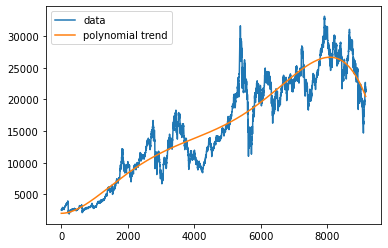

In [103]:
plt.plot(x_values, y_values)
plt.plot(x_values, y_pred)
plt.legend(['data', 'polynomial trend'])
plt.show()

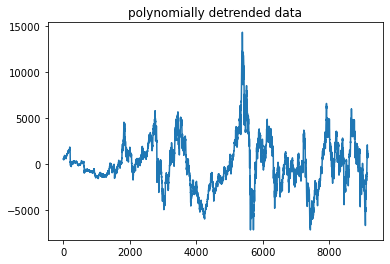

In [104]:
detrpoly = [y_values[i] - y_pred[i] for i in range(0, len(y_values))]
plt.plot(x_values, detrpoly)
plt.title('polynomially detrended data')
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_values, y_pred)
rmse = np.sqrt(mean_squared_error(y_values, y_pred))
print('r2:', r2)
print('rmse', rmse)

r2: 0.8945072246599539
rmse 2631.886067114688


In [106]:
result['New_Price'] = detrpoly

In [107]:
import statsmodels.api as sm

x = result.drop(['New_Price', 'Price', 'Date', 'day'], axis=1)
y = result['New_Price']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              New_Price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     5227.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:17:01   Log-Likelihood:                -78386.
No. Observations:                9167   AIC:                         1.568e+05
Df Residuals:                    9160   BIC:                         1.568e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -163.9675    126.804     -1.293      0.1

In [ ]:
result.loc[result['3'] == 1].mean()[0]/result.loc[result['5'] == 1].mean()[0]

# Interday (Month)

In [42]:
Interday2 = pd.DataFrame()
Interday2 = pd.read_excel('DATA1 EX 4.xlsx', sheet_name = 'Interday_data')
Interday2 = Interday2[['Date','Price']]

In [43]:
Interday2.head()

,Date,Price
0,1987-01-02,2540.100098
1,1987-01-05,2552.399902
2,1987-01-06,2583.899902
3,1987-01-07,2607.100098
4,1987-01-08,2603.300049


In [44]:
Interday2 = Interday2.interpolate(method='linear', axis=0, limit=None)

In [45]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for i in range(12):
    Interday2[months[i]] = (pd.DatetimeIndex(Interday2['Date']).month == i+1).astype(int)

In [46]:
Interday2.head()

,Date,Price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1987-01-02,2540.100098,1,0,0,0,0,0,0,0,0,0,0,0
1,1987-01-05,2552.399902,1,0,0,0,0,0,0,0,0,0,0,0
2,1987-01-06,2583.899902,1,0,0,0,0,0,0,0,0,0,0,0
3,1987-01-07,2607.100098,1,0,0,0,0,0,0,0,0,0,0,0
4,1987-01-08,2603.300049,1,0,0,0,0,0,0,0,0,0,0,0


In [47]:
from scipy import signal
detrended = signal.detrend(Interday2.Price)
detrended_df = np.array(detrended)
Interday2['detrended'] = detrended_df
Interday2.head()

,Date,Price,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,detrended
0,1987-01-02,2540.100098,1,0,0,0,0,0,0,0,0,0,0,0,210.999739
1,1987-01-05,2552.399902,1,0,0,0,0,0,0,0,0,0,0,0,220.454116
2,1987-01-06,2583.899902,1,0,0,0,0,0,0,0,0,0,0,0,249.108688
3,1987-01-07,2607.100098,1,0,0,0,0,0,0,0,0,0,0,0,269.463457
4,1987-01-08,2603.300049,1,0,0,0,0,0,0,0,0,0,0,0,262.817980


In [48]:
Interday2['New_Price'] = detrpoly
x = Interday2.drop(['New_Price', 'Price', 'Date'], axis=1)
y = Interday2['New_Price']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              New_Price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     2616.
Date:                Sun, 12 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:29:23   Log-Likelihood:                -78380.
No. Observations:                9167   AIC:                         1.568e+05
Df Residuals:                    9154   BIC:                         1.569e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0058     12.072     -0.000      1.0

In [49]:
Interday2.loc[Interday2['Jan'] == 1].mean()[0]/Interday2.loc[Interday2['Mar'] == 1].mean()[0]

1.0145221535668438